In [ ]:
# Sep 6th

# Simulations demonstrate that different behaviors of the residuals as a function of features 
# can emerge due to variation in which features are modeled, and how they are modeled, 
# and covariation of features with themselves. 
# 
# We can also shed light on how performance varies as a function of feature values, 
# by plotting the distribution of residuals for simulated constrained and neutral intervals for two cases: 
#   (i) the residuals are computed relative to the true y under neutrality, and 
#   (ii) the residuals are computed relative to the predicted y under neutrality. 
# I don’t expect that the two classes become more differentiated on going from (i) to (ii), 
# but perhaps there are scenarios where they do, as a function of GC content, say. 
# One contrived example is a meta model of cancer prediction that uses 
#   (i) features like tumor size to predict cancer when there is no text on the image
#   (ii) or text like "cancer center", when it is present
# When presented with a data set in which the positive examples have the text, the model may perform perfectly. 
# Conversely, when presented with a data set in which the positive examples do not have the text, the model will likely perform worse. 
# This illustrates how a better model can perform worse! 

# More importantly, use these simulations to show that the PR curve does not change as a function of feature value when the residuals are unbiased, 
# i.e., when the model is complete/perfectly specified.

In [1]:
# [PRIVATE NOTE] (23 Aug 2024): 

# We know that SNV density declines with GC content. 
# Yet that doesn’t necessarily mean that SNV density, 
# predicted under a model that does not include GC content, 
# would be constant as a function of GC content. 
# That is, such a model would overestimate SNV density at high GC content. 
# That’s because the model may include a feature that co-varies with GC content. 
# When we realize this, it becomes clear that residuals could increase or decrease with GC content, 
# depending upon what was modeled, and how those features co-vary with GC content. 

# These intuitions are supported by the following simulations. 


In [2]:
# TODO
# following uninstall and install instructions at: https://github.com/OpenMined/PySyft/issues/8705
# and/or use pyenv to manage python versions

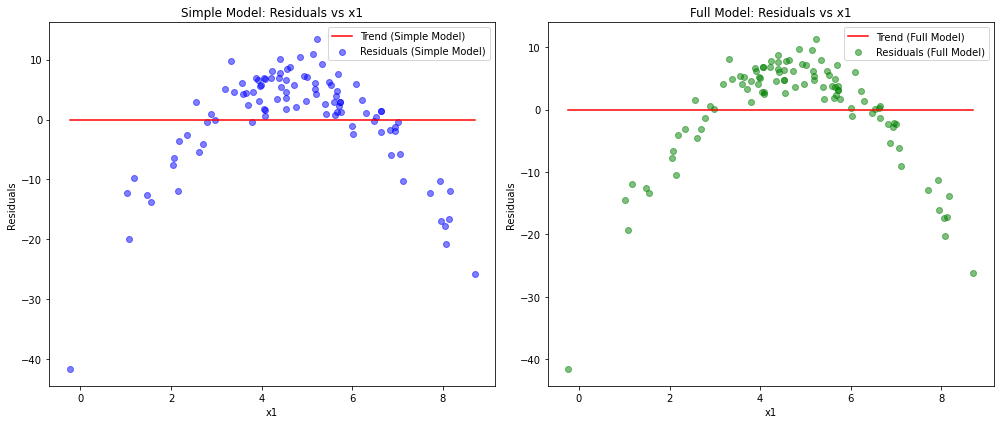

In [3]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Generate x1 values from a normal distribution
x1 = np.random.normal(loc=5, scale=2, size=100)  # mean=5, std=2, n=100

# Generate x2 values dependent on x1 with some noise
eta = np.random.normal(0, 0.5, size=x1.shape)
x2 = -x1 + eta

# Generate y values using the given relationship
epsilon = np.random.normal(0, 1, size=x1.shape)
y = 4*x1 + 6*x2 - 2*x1**2 + epsilon

# Simple linear regression (only x1)
X1 = sm.add_constant(x1)
model1 = sm.OLS(y, X1).fit()
residuals1 = y - model1.predict(X1)

# Multiple linear regression (both x1 and x2)
X2 = sm.add_constant(np.column_stack((x1, x2)))
model2 = sm.OLS(y, X2).fit()
residuals2 = y - model2.predict(X2)

# Plotting the mean residuals as a function of x1
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(x1, residuals1, color='blue', alpha=0.5, label='Residuals (Simple Model)')
plt.plot(np.sort(x1), np.poly1d(np.polyfit(x1, residuals1, 1))(np.sort(x1)), color='red', label='Trend (Simple Model)')
plt.xlabel('x1')
plt.ylabel('Residuals')
plt.title('Simple Model: Residuals vs x1')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(x1, residuals2, color='green', alpha=0.5, label='Residuals (Full Model)')
plt.plot(np.sort(x1), np.poly1d(np.polyfit(x1, residuals2, 1))(np.sort(x1)), color='red', label='Trend (Full Model)')
plt.xlabel('x1')
plt.ylabel('Residuals')
plt.title('Full Model: Residuals vs x1')
plt.legend()

plt.tight_layout()
plt.show()


In [4]:
import numpy as np

# Define the mean and covariance matrix
mean = [0, 0, 0]  # Means for the three variables

# Covariance matrix (symmetric and positive-definite)
cov = [
    [1.0, 0.8, 0.5],  # Variance of X1 and covariances with X2 and X3
    [0.8, 1.0, 0.3],  # Covariance of X2 with X1 and variance of X2 and covariance with X3
    [0.5, 0.3, 1.0]   # Covariance of X3 with X1 and X2 and variance of X3
]

# Generate the correlated variables
data = np.random.multivariate_normal(mean, cov, size=1000)

# Split the data into three separate variables
X1, X2, X3 = data.T

# Display the first 5 rows to check
print("First 5 rows of generated data:")
print(data[:5])


First 5 rows of generated data:
[[ 0.93013397  0.29519776  0.90150143]
 [-0.54232204 -0.5712775  -0.40334894]
 [-1.12013238 -1.50183822 -0.46688337]
 [ 0.49445465 -0.20061121  0.19817119]
 [-0.26655057 -0.72215381 -1.26862168]]


In [5]:
import numpy as np

# Number of 3D vectors to generate
num_vectors = 1000

# Generate the uniform distribution of 3D vectors
uniform_3d_vectors = np.random.uniform(-1, 1, (num_vectors, 3))

# Display the first 10 vectors as a sample
print(uniform_3d_vectors[:10])


[[-7.33580152e-01  2.64792513e-01 -7.43348276e-01]
 [ 1.56985016e-01  3.86844256e-01  4.01222993e-01]
 [ 5.06944221e-01  7.45718843e-01 -8.20160704e-05]
 [ 4.60498379e-01  2.38345471e-01 -6.26720120e-01]
 [-9.48620710e-01 -4.30917229e-01 -1.13932587e-01]
 [ 2.34211889e-01  6.99918661e-01 -6.07508567e-01]
 [-7.48900420e-01  9.26959895e-01 -7.83910881e-01]
 [-4.30178598e-02  1.71127458e-01  8.27488418e-02]
 [-8.27935686e-01 -8.85946172e-01 -7.89033145e-01]
 [ 1.71175368e-01  8.86897753e-02 -5.32518416e-01]]


/Users/petermchale/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/Users/petermchale/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


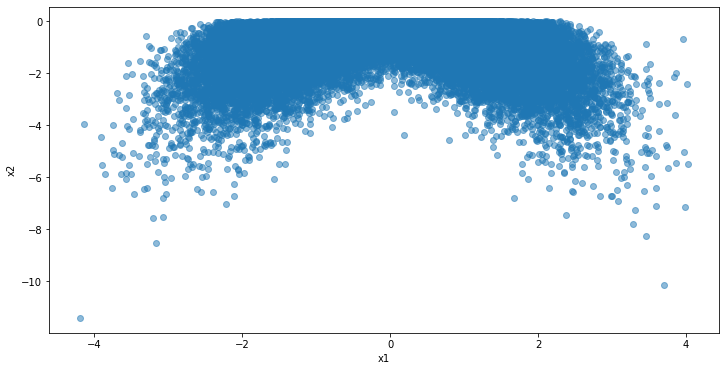

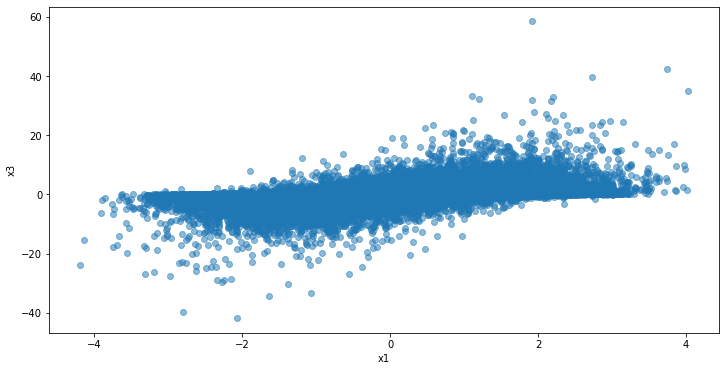

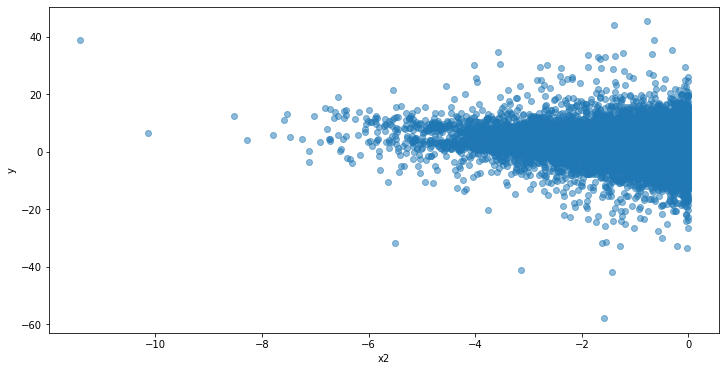

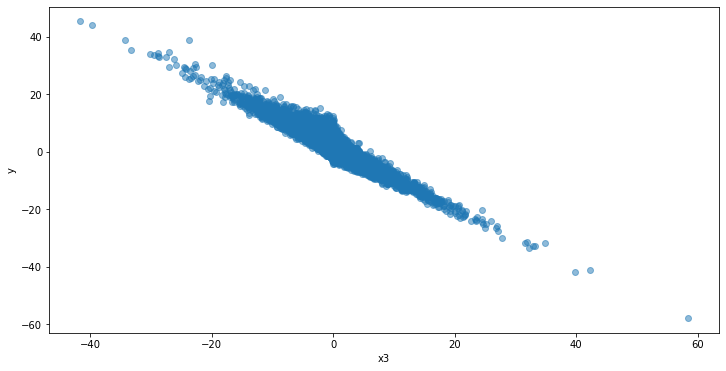

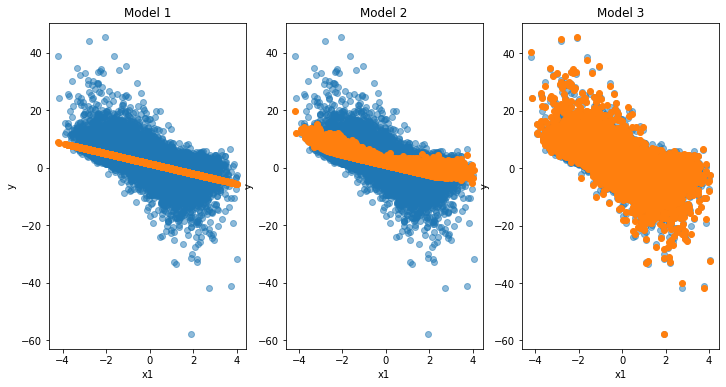

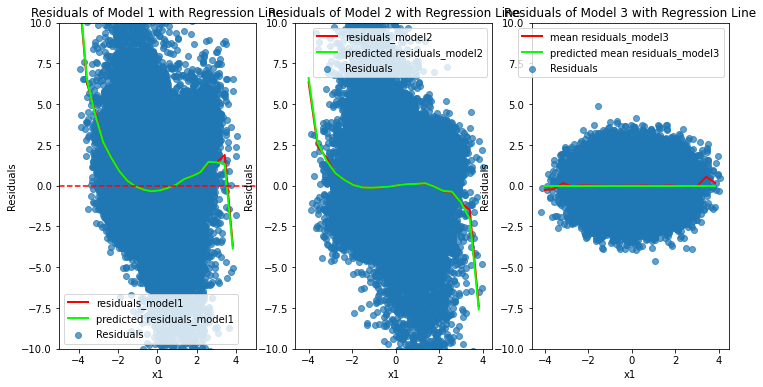

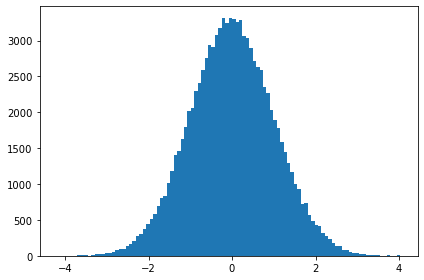

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

def f():
  n = 100000
  ylim = (-10, 10)

  # Define the mean and covariance matrix
  mean = [0, 0, 0]  # Means for the three variables

  # Covariance matrix (symmetric and positive-definite)
  # we need non-zero covariances to exhibit the bias in residuals as a function of x1
  cov = [
      [1.0, 0.8, 0.5],  # Variance of X1 and covariances with X2 and X3
      [0.8, 1.0, 0.3],  # Covariance of X2 with X1 and variance of X2 and covariance with X3
      [0.5, 0.3, 1.0]   # Covariance of X3 with X1 and X2 and variance of X3
  ]

  # cov = [
  #     [1.0, 0.0, 0.0],  # Variance of X1 and covariances with X2 and X3
  #     [0.0, 1.0, 0.0],  # Covariance of X2 with X1 and variance of X2 and covariance with X3
  #     [0.0, 0.0, 1.0]   # Covariance of X3 with X1 and X2 and variance of X3
  # ]

  # Generate the correlated variables
  data = np.random.multivariate_normal(mean, cov, size=n)

  # Split the data into three separate variables
  x1, x2, x3 = data.T

  x2 = -0.5 * x2**2 
  x3 = +0.5 * x3**3
  
  plt.figure(figsize=(12, 6))
  plt.plot(x1, x2, 'o', alpha=0.5)
  plt.xlabel('x1')
  plt.ylabel('x2')

  plt.figure(figsize=(12, 6))
  plt.plot(x1, x3, 'o', alpha=0.5)
  plt.xlabel('x1')
  plt.ylabel('x3')

  y = (
    1 
    - 1 * x1 
    - 0 * x1**2 
    - 0 * x1**3 
    - 1 * x2 
    - 0 * x2**2 
    - 1 * x3
    + 0 * x3**3
    + 0 * x1 * x2 
    + np.random.normal(0, 1, n)
  )  

  plt.figure(figsize=(12, 6))
  plt.plot(x2, y, 'o', alpha=0.5)
  plt.xlabel('x2')
  plt.ylabel('y')

  plt.figure(figsize=(12, 6))
  plt.plot(x3, y, 'o', alpha=0.5)
  plt.xlabel('x3')
  plt.ylabel('y')

  # Create DataFrame
  data = pd.DataFrame({'x1': x1, 'x2': x2, 'x3': x3, 'y': y})

  # Fit Model 1: y ~ x1
  X1 = sm.add_constant(data['x1'])
  model1 = sm.OLS(data['y'], X1).fit()
  data['predicted_y_model1'] = model1.predict(X1)
  data['residuals_model1'] = model1.resid

  # Fit Model 2: y ~ x1 + x2
  X2 = sm.add_constant(data[['x1', 'x2']])
  model2 = sm.OLS(data['y'], X2).fit()
  data['predicted_y_model2'] = model2.predict(X2)
  data['residuals_model2'] = model2.resid

  # Fit Model 3: y ~ x1 + x2 + x3
  X3 = sm.add_constant(data[['x1', 'x2', 'x3']])
  model3 = sm.OLS(data['y'], X3).fit()
  data['predicted_y_model3'] = model3.predict(X3)
  data['residuals_model3'] = model3.resid
  
  plt.figure(figsize=(12, 6))

  plt.subplot(1, 3, 1)
  plt.plot(x1, y, 'o', alpha=0.5)
  plt.plot(data['x1'], data['predicted_y_model1'], 'o', label='Model 1')
  plt.xlabel('x1')
  plt.ylabel('y')
  plt.title('Model 1')

  plt.subplot(1, 3, 2)
  plt.plot(x1, y, 'o', alpha=0.5)
  plt.plot(data['x1'], data['predicted_y_model2'], 'o', label='Model 2')
  plt.xlabel('x1')
  plt.ylabel('y')
  plt.title('Model 2')

  plt.subplot(1, 3, 3)
  plt.plot(x1, y, 'o', alpha=0.5)
  plt.plot(data['x1'], data['predicted_y_model3'], 'o', label='Model 3')
  plt.xlabel('x1')
  plt.ylabel('y')
  plt.title('Model 3')

  data['x1_bin_midpoints'] = (pd
      .cut(data['x1'], bins=20, labels=None)
      .apply(lambda x: (x.right + x.left) / 2)
  )

  average_target1 = data.groupby('x1_bin_midpoints')['residuals_model1'].mean()  
  average_target2 = data.groupby('x1_bin_midpoints')['residuals_model2'].mean()
  average_target3 = data.groupby('x1_bin_midpoints')['residuals_model3'].mean()

  # Regress the residuals of Model 1 onto x1 and x2 
  X_reg = sm.add_constant(data[['x1', 'x2', 'x3']])
  reg_model1 = sm.OLS(data['residuals_model1'], X_reg).fit()
  data['fitted_line_model1'] = reg_model1.predict(X_reg)
  average_predicted_target1 = data.groupby('x1_bin_midpoints')['fitted_line_model1'].mean()

  # Regress the residuals of Model 2 onto x1 and x2
  reg_model2 = sm.OLS(data['residuals_model2'], X_reg).fit()
  data['fitted_line_model2'] = reg_model2.predict(X_reg)
  average_predicted_target2 = data.groupby('x1_bin_midpoints')['fitted_line_model2'].mean()

  # Regress the residuals of Model 3 onto x1 and x2
  reg_model3 = sm.OLS(data['residuals_model3'], X_reg).fit()
  data['fitted_line_model3'] = reg_model3.predict(X_reg)
  average_predicted_target3 = data.groupby('x1_bin_midpoints')['fitted_line_model3'].mean()

  # Plot residuals and regression lines and trend lines 
  plt.figure(figsize=(12, 6))

  # model 1 residuals 
  plt.subplot(1, 3, 1)
  plt.scatter(data['x1'], data['residuals_model1'], alpha=0.7, label='Residuals')
  plt.plot(average_target1.index, average_target1.values, color='red', lw=2, label=f'residuals_model1') 
  plt.plot(average_predicted_target1.index, average_predicted_target1.values, color=(8/255, 255/255, 0/255), lw=2, label=f'predicted residuals_model1') # green
  plt.axhline(0, color='red', linestyle='--')
  plt.title('Residuals of Model 1 with Regression Line')
  plt.xlabel('x1')
  plt.ylabel('Residuals')
  plt.ylim(ylim)
  plt.xlim(-5, 5)
  plt.ylim(-10, 10)
  plt.legend()

  # model 2 residuals
  plt.subplot(1, 3, 2)
  plt.scatter(data['x1'], data['residuals_model2'], alpha=0.7, label='Residuals')
  plt.plot(average_target2.index, average_target2.values, color='red', lw=2, label=f'residuals_model2') 
  plt.plot(average_predicted_target2.index, average_predicted_target2.values, color=(8/255, 255/255, 0/255), lw=2, label=f'predicted residuals_model2') # green
  plt.title('Residuals of Model 2 with Regression Line')
  plt.xlabel('x1')
  plt.ylabel('Residuals')
  plt.ylim(ylim)
  plt.legend()

  # model 3 residuals
  plt.subplot(1, 3, 3)
  plt.scatter(data['x1'], data['residuals_model3'], alpha=0.7, label='Residuals')
  plt.plot(average_target3.index, average_target3.values, color='red', lw=2, label=f'mean residuals_model3') 
  plt.plot(average_predicted_target3.index, average_predicted_target3.values, color=(8/255, 255/255, 0/255), lw=2, label=f'predicted mean residuals_model3') # green
  plt.title('Residuals of Model 3 with Regression Line')
  plt.xlabel('x1')
  plt.ylabel('Residuals')
  plt.ylim(ylim)
  plt.legend()

  plt.figure()
  plt.hist(data['x1'], bins=100)

  plt.tight_layout()
  plt.show()

f()